# Project Milestone 5
## DSC 540
## Weeks 11 and 12
## Data Preparation Assignment Weeks 11 and 12
## David Berberena
## 6/1/2024

## Section 1: Merging the Data and Storing in a Database

In [1]:
# For me to work with SQL and my datasets (I have previously saved them to CSV files via pd.to_csv()), I will import sqlite3
# and pandas.

import sqlite3
import pandas as pd

# After researching the best way to convert CSV file data into a SQL table, I came across the to_sql() function in pandas. 
# I will craft a new SQL database via the sqlite3.connect() function and read in my CSV files one at a time as DataFrames. 
# I can then use the to.sql() function to convert each DataFrame to a SQL table, name the title of the new SQL table, and
# place that new table into the database that has been created (the arguments if_exists and index are here to ensure smooth
# tabke transition and code reproducibility). This SQL conversion will take place with each DataFrame.

poke_db = sqlite3.connect('Pokemon_data.db')

poke_flat = pd.read_csv('all_pokemon_flat_file.csv')

poke_web = pd.read_csv('all_pokemon_web_page.csv')

poke_api = pd.read_csv('all_pokemon_api.csv')

poke_flat.to_sql('Flat_File_Pokemon_Data', poke_db, if_exists = 'replace', index = False)

poke_web.to_sql('Web_Page_Pokemon_Data', poke_db, if_exists = 'replace', index = False)

poke_api.to_sql('API_Pokemon_Data', poke_db, if_exists = 'replace', index = False)

poke_db.close()

In [2]:
# I will verify that all of the tables have been created in my SQL database by outputting the table names. I can do this by 
# querying the sqlite_master metadata within my database, which is where information about the database (including table 
# names) are stored. I will be using the SELECT command to access each table name, the FROM command to pull from the 
# sqlite_master metadata within my Pokemon_data.db database, and the WHERE command to apply the condition that the names I 
# need are to be pulled from those objects within my database that have the table type. After fetching the results of my SQL
# query using the fetchall() function, I will use a for loop to print the name of each table. 

poke_db = sqlite3.connect('Pokemon_data.db')

poke_cursor = poke_db.cursor()

poke_cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")

poke_tables = poke_cursor.fetchall()

for table in poke_tables:
    print(table[0])

poke_db.close()

Joined_Pokemon_Data
Flat_File_Pokemon_Data
Web_Page_Pokemon_Data
API_Pokemon_Data


In [3]:
# As the API Pokemon Data table actually encompasses all of the information and values stored in the Web Page Pokemon Data 
# and the Flat File Pokemon Data tables, I will only be joining the two latter tables using an inner join on the 
# Pokemon_name common column in both tables. My query will be very long as I need to specify each column that needs to be in
# the final joined table.

poke_db = sqlite3.connect('Pokemon_data.db')

poke_cursor = poke_db.cursor()

poke_cursor.execute('''SELECT
    Flat_File_Pokemon_Data.Pokedex_entry_number,
    Flat_File_Pokemon_Data.Pokemon_name,
    Flat_File_Pokemon_Data.Primary_type,
    Flat_File_Pokemon_Data.Secondary_type,
    Flat_File_Pokemon_Data.Total_stats,
    Flat_File_Pokemon_Data.HP_stat,
    Flat_File_Pokemon_Data.Attack_stat,
    Flat_File_Pokemon_Data.Defense_stat,
    Flat_File_Pokemon_Data.Special_attack_stat,
    Flat_File_Pokemon_Data.Special_defense_stat,
    Flat_File_Pokemon_Data.Speed_stat,
    Web_Page_Pokemon_Data.Avg_of_stats,
    Web_Page_Pokemon_Data.Deviation_of_stats
FROM
    Flat_File_Pokemon_Data
INNER JOIN
    Web_Page_Pokemon_Data
ON
    Flat_File_Pokemon_Data.Pokemon_name = Web_Page_Pokemon_Data.Pokemon_name
''')

# Now that I have queried the data in SQL to perform the inner join, I will print the results that match both tables by the 
# use of a for loop.

joined_results = poke_cursor.fetchall()

for row in joined_results:
    print(row)

poke_db.close()

(1, 'Bulbasaur', 'Grass', 'Poison', 318, 45, 49, 49, 65, 65, 45, 53.0, 8.64)
(2, 'Ivysaur', 'Grass', 'Poison', 405, 60, 62, 63, 80, 80, 60, 67.5, 8.9)
(3, 'Venusaur', 'Grass', 'Poison', 525, 80, 82, 83, 100, 100, 80, 87.5, 8.9)
(6, 'Charizard', 'Fire', 'Flying', 534, 78, 84, 78, 109, 85, 100, 89.0, 11.58)
(12, 'Butterfree', 'Bug', 'Flying', 395, 60, 45, 50, 90, 80, 70, 65.83, 15.92)
(13, 'Weedle', 'Bug', 'Poison', 195, 40, 35, 30, 20, 20, 50, 32.5, 10.7)
(14, 'Kakuna', 'Bug', 'Poison', 205, 45, 25, 50, 25, 25, 35, 34.17, 10.17)
(15, 'Beedrill', 'Bug', 'Poison', 395, 65, 90, 40, 45, 80, 75, 65.83, 18.12)
(16, 'Pidgey', 'Normal', 'Flying', 251, 40, 45, 40, 35, 35, 56, 41.83, 7.2)
(17, 'Pidgeotto', 'Normal', 'Flying', 349, 63, 60, 55, 50, 50, 71, 58.17, 7.47)
(18, 'Pidgeot', 'Normal', 'Flying', 479, 83, 80, 75, 70, 70, 101, 79.83, 10.61)
(21, 'Spearow', 'Normal', 'Flying', 262, 40, 60, 30, 31, 31, 70, 43.67, 15.71)
(22, 'Fearow', 'Normal', 'Flying', 442, 65, 90, 65, 61, 61, 100, 73.67, 15

In [4]:
# With the inner join being successful, I wish to move onto the visualization portion of the milestone, yet I must first 
# move the results of my joined table to a DataFrame, as I intend to perform visualization tasks with Matplotlib. For me to 
# move the results to a DataFrame, I found that pandas has a function designed for this called pd.read_sql_query(). The 
# arguments needed are the actual SQL query and the database that is being queried. I will craft the resulting DataFrame by 
# storing my above query as a variable for the pd.read_sql_query() function.

poke_db = sqlite3.connect('Pokemon_data.db')

pokemon_query = '''SELECT
    Flat_File_Pokemon_Data.Pokedex_entry_number,
    Flat_File_Pokemon_Data.Pokemon_name,
    Flat_File_Pokemon_Data.Primary_type,
    Flat_File_Pokemon_Data.Secondary_type,
    Flat_File_Pokemon_Data.Total_stats,
    Flat_File_Pokemon_Data.HP_stat,
    Flat_File_Pokemon_Data.Attack_stat,
    Flat_File_Pokemon_Data.Defense_stat,
    Flat_File_Pokemon_Data.Special_attack_stat,
    Flat_File_Pokemon_Data.Special_defense_stat,
    Flat_File_Pokemon_Data.Speed_stat,
    Web_Page_Pokemon_Data.Avg_of_stats,
    Web_Page_Pokemon_Data.Deviation_of_stats
FROM
    Flat_File_Pokemon_Data
INNER JOIN
    Web_Page_Pokemon_Data
ON
    Flat_File_Pokemon_Data.Pokemon_name = Web_Page_Pokemon_Data.Pokemon_name
'''

fused_poke_data = pd.read_sql_query(pokemon_query, poke_db)

poke_db.close()

# I will print the DataFrame to ensure that the results of the SQL query have been transferred over to the DataFrame 
# correctly.

fused_poke_data

,Pokedex_entry_number,Pokemon_name,Primary_type,Secondary_type,Total_stats,HP_stat,Attack_stat,Defense_stat,Special_attack_stat,Special_defense_stat,Speed_stat,Avg_of_stats,Deviation_of_stats
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,53.00,8.64
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,67.50,8.90
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,87.50,8.90
3,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,89.00,11.58
4,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,65.83,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,40.83,7.86
333,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,89.17,17.12
334,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,113.33,16.13
335,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,100.00,40.82


In [5]:
# Now that the joined data has been converted to a Pandas DataFrame, I can add the data as a table in SQL just as I did with
# the three datasets at the very beginning.

poke_db = sqlite3.connect('Pokemon_data.db')

fused_poke_data.to_sql('Joined_Pokemon_Data', poke_db, if_exists = 'replace', index = False)

# I will also output the table names within the database just like I did before to verify that the joined dataset has indeed
# been stored within my SQL database.

poke_cursor = poke_db.cursor()

poke_cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")

poke_tables = poke_cursor.fetchall()

for table in poke_tables:
    print(table[0])

poke_db.close()

Flat_File_Pokemon_Data
Web_Page_Pokemon_Data
API_Pokemon_Data
Joined_Pokemon_Data


## Section 2: Visualizing Data

### Visualization 1: Count Comparison of Primary Types vs Secondary Types (API Dataset)

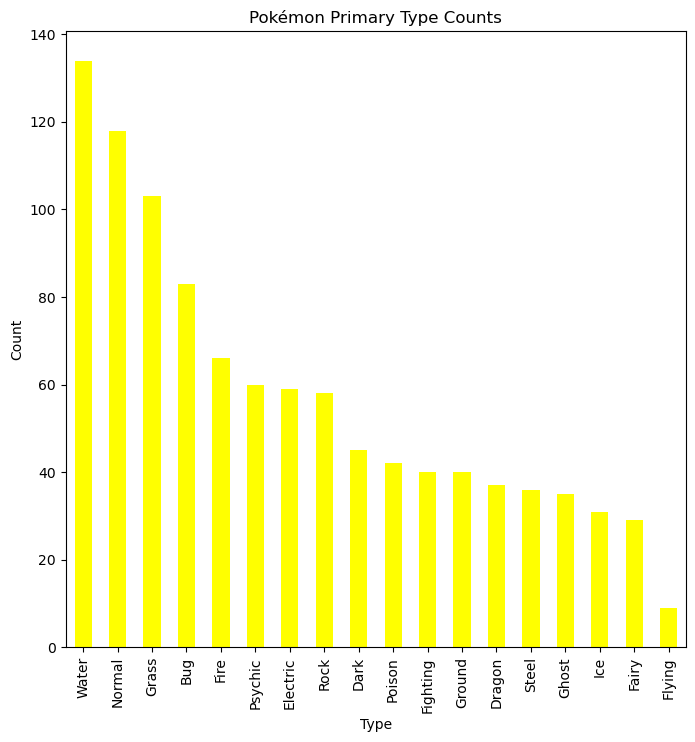

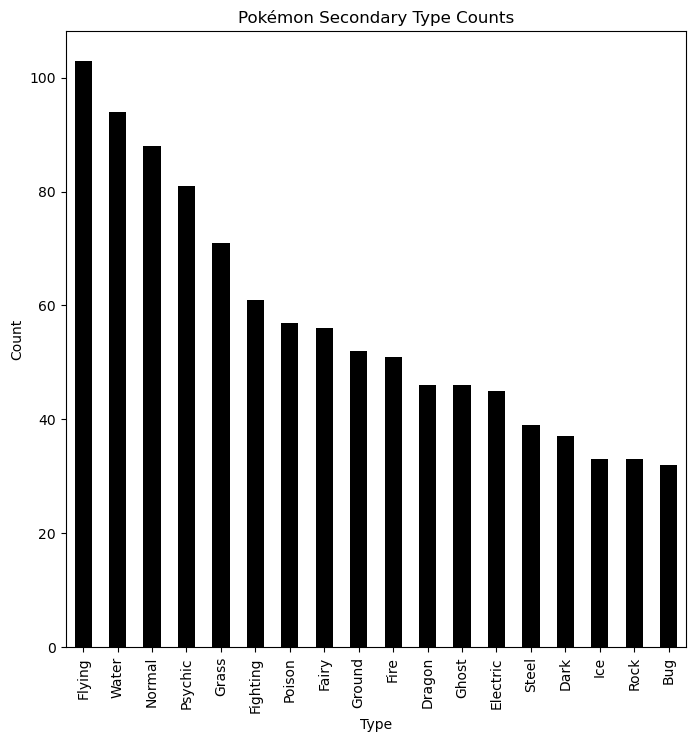

In [6]:
# As stated above, I wish to use Matplotlib for my visualizations, so I will import it here. 

import matplotlib.pyplot as plt

# To accomplish the first visualization I want to show, which is the distribution of primary Pokémon types versus that of 
# secondary Pokémon types, I actually need to make two bar charts: one for primary and one for secondary. Using the 
# value_counts() function and the plot() function of Matplotlib with the kind argument specified as 'bar', I can extract the
# values from the Primary_type and Secondary_type columns to plot them as bar charts. For every visualization, I have made 
# the figure() function's figsize argument 8 by 8 across the board for increased readability. I have chosen to use the API 
# Pokémon dataset since it captures every Pokémon to date, so there will be no missing observations. 

primary_type_counts = poke_api['Primary_type'].value_counts()

secondary_type_counts = poke_api['Secondary_type'].value_counts()

plt.figure(figsize = (8, 8))
primary_type_counts.plot(kind = 'bar', color = 'yellow')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Pokémon Primary Type Counts')
plt.show()

plt.figure(figsize = (8, 8))
secondary_type_counts.plot(kind = 'bar', color = 'black')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Pokémon Secondary Type Counts')
plt.show()

### Visualization 2: Distribution Percentages of Primary Types (Joined Dataset)

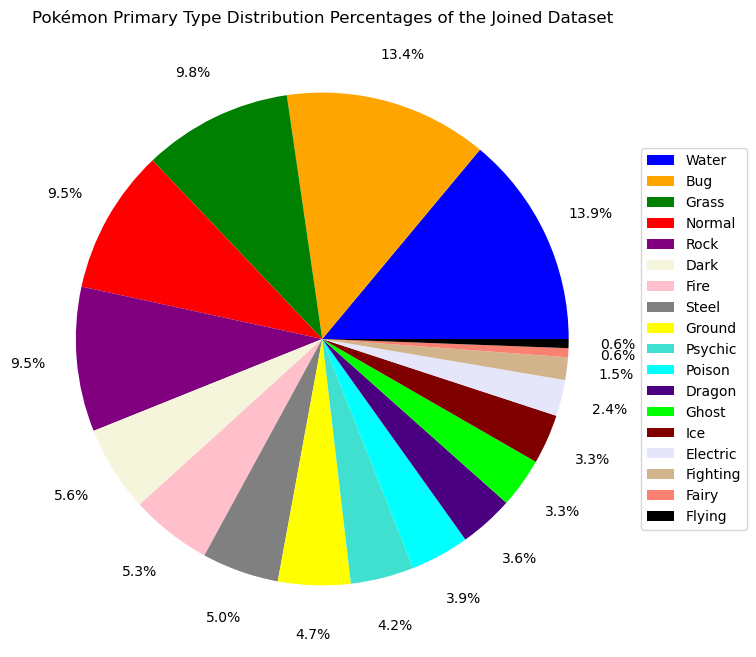

In [7]:
# For this second visualization, I have chosen to show the primary type distribution again, yet with the joined dataset from
# SQL and by employing a pie chart. This will lead me to find if the most prevalent primary type in the previous chart is 
# the same as this visualization. I will create the variables needed in my pie chart here using value_counts() again.

joined_primary_type_counts = fused_poke_data['Primary_type'].value_counts()
joined_types = joined_primary_type_counts.index
poke_slices = joined_primary_type_counts.values

# Since this pie chart will have to show eighteen different Pokémon types, I need to specify eighteen easily distinguishable
# colors for each slice of the pie and enlarge the pie chart output to read the chart. The figure() function with the 
# figsize argument can help with blowing up the chart's size and the colors argument when crafting the pie chart using the 
# pie() function allows me to identify each color I want the pie slices to have. I also have attached percentages attributed
# to each slice, as well as a legend that I have moved away from the pie chart using the loc and bbox_to_anchor arguments as
# the chart is very big and the legend would have displayed smack in the middle of it (I had to research a lot to find these
# lesser known arguments within Matplotlib's legend() function to make the chart display nicely).

plt.figure(figsize = (8, 8))
plt.pie(poke_slices, autopct = '%1.1f%%', pctdistance = 1.2, colors = ['blue', 'orange', 'green', 'red', 'purple', 'beige', 
        'pink', 'gray', 'yellow', 'turquoise', 'cyan', 'indigo', 'lime', 'maroon', 'lavender', 
        'tan', 'salmon', 'black'])
plt.title('Pokémon Primary Type Distribution Percentages of the Joined Dataset')
plt.legend(labels = joined_types, loc = 'right', bbox_to_anchor = (1.2, 0.5))
plt.show()

### Visualization 3: Frequency Distribution of Total Stats (Flat File Dataset)

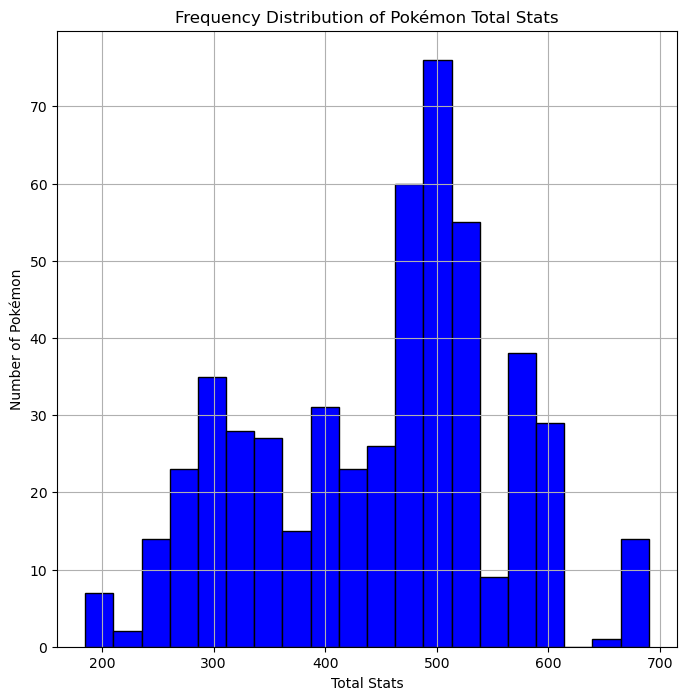

In [8]:
# My next visualization takes the flat file dataset and highlights the distribution of total stats amongst all Pokémon in 
# the dataset, which encompasses all Pokémon currently that have a primary and a secondary type. As these Pokémon 
# are considered to be more versatile due to this dual typing, I wanted to see where the largest proportion of these Pokémon
# end in the total stats range. Using the hist() function along with arguments like bins, color, and edgecolor, I can show 
# the output of the histogram with great accuracy and smoothness. I also have added in a grid to make it easier to discern 
# the number of Pokémon for each bar.

plt.figure(figsize = (8, 8))
plt.hist(poke_flat['Total_stats'], bins = 20, color = 'blue', edgecolor = 'black')
plt.xlabel('Total Stats')
plt.ylabel('Number of Pokémon')
plt.title('Frequency Distribution of Pokémon Total Stats')
plt.grid(True)
plt.show()

### Visualization 4: Total Stat Average Across Regions (Web Page Dataset)

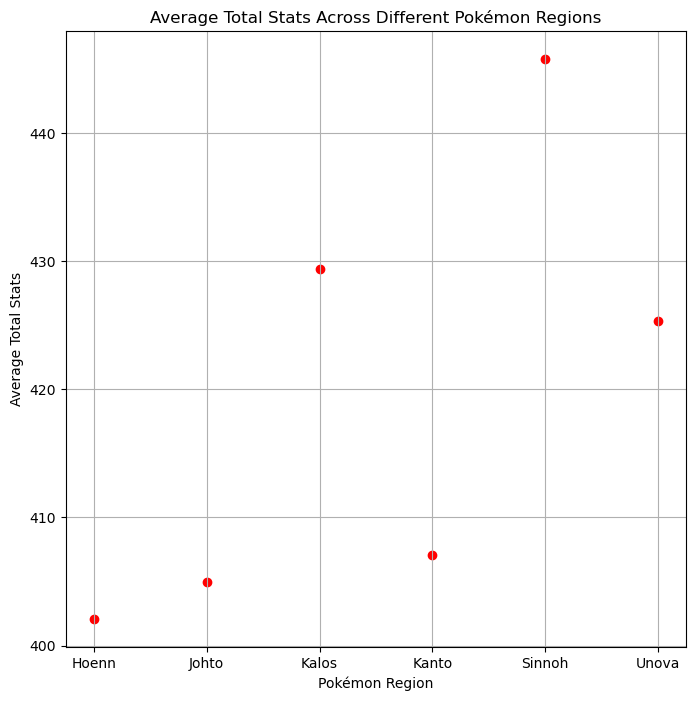

In [9]:
# For this visualization, I need to alter my web page dataset to classify the Pokémon by their region of origin. New Pokémon
# are made available through the access of a new Pokémon region, and the subsequent release of those regions throughout the 
# anime and games are tied to the batch of Pokémon that indigenous to that region. These batches of Pokémon can
# be classified as being in one of nine current regions: Kanto, Johto, Hoenn, Sinnoh, Unova, Kalos, Alola, Galar, or Paldea.
# However, as I am using the web page dataset, the observations within only reach the end of Generation 6, which means the 
# Pokémon in this dataset can only be a part of the first six regions. To begin, since I will be working to plot the average 
# of the Total_stats column across the Pokémon within each region, I will need to import the NumPy library.

# To classify these Pokémon by their region of origin, I need to craft a variable containing a list of ranges of 
# observations based on the batch size of the Pokémon within the first six generations. I also will need to specify the 
# names of the six regions the dataset encompasses as a second variable.

import numpy as np

poke_generations = [
    (poke_web['Pokedex_entry_number'] >= 1) & (poke_web['Pokedex_entry_number'] <= 151),
    (poke_web['Pokedex_entry_number'] >= 152) & (poke_web['Pokedex_entry_number'] <= 251),
    (poke_web['Pokedex_entry_number'] >= 252) & (poke_web['Pokedex_entry_number'] <= 386),
    (poke_web['Pokedex_entry_number'] >= 387) & (poke_web['Pokedex_entry_number'] <= 493),
    (poke_web['Pokedex_entry_number'] >= 494) & (poke_web['Pokedex_entry_number'] <= 649),
    (poke_web['Pokedex_entry_number'] >= 650) & (poke_web['Pokedex_entry_number'] <= 721)
]
poke_regions = ['Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova', 'Kalos']

# These two variables will now be used to create a new column within the poke_web dataset using the pd.Series() and 
# np.select() functions.

poke_web['Region_of_origin'] = pd.Series(np.select(poke_generations, poke_regions))

# To find the average total stats for each region, I have grouped the dataset based on the new region column and the 
# Total_stat column to find the mean.

avg_total_region_stats = poke_web.groupby('Region_of_origin')['Total_stats'].mean()

# Now that each region has a specific average total stat number attached to it, I can now plot these stats using a scatter 
# plot. The scatter() function will be employed to craft the scatter plot using the indices and values of the variable 
# containing the mean total stats of all the regions. I have added a grid to this visualization as well. 

plt.figure(figsize=(8, 8))
plt.scatter(avg_total_region_stats.index, avg_total_region_stats.values, color = 'red')
plt.xlabel('Pokémon Region')
plt.ylabel('Average Total Stats')
plt.title('Average Total Stats Across Different Pokémon Regions')
plt.grid(True)
plt.show()


### Visualization 5: Top 10 Pokémon with the Highest Total Stats (Joined Dataset)

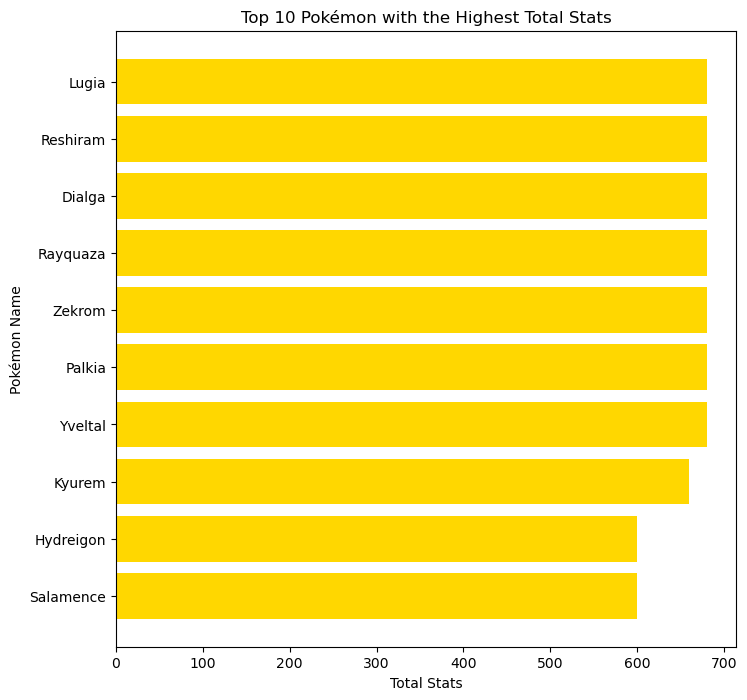

In [13]:
# Using the joined dataset, I wish to see what Pokémon Ash Ketchum may have been able to capture in one of the six 
# generations prior to his Alola Pokémon League win in the Alola region of Generation 7 that could have helped him win in 
# those prior generations. As stated earlier, since Pokémon of dual typing are known to be more versatile, I will use the 
# joined dataset to visualize the data's findings as the first six generations of Pokémon having both primary and secondary 
# types live in this dataset. I can confirm this based on the last visualization where I sectioned the Pokémon into their 
# respective regions, and Generation 6 (Kalos) ends at PokéDex number 721, the last Pokémon in the dataset here.

# Using the sort_values() function, I will have the dataset list its observations by total stats in descending order.

top_down_pokemon = fused_poke_data.sort_values(by ='Total_stats', ascending = False)

# By encasing the first 10 observations in a variable and ensuring that they will be plotted in descending order using the 
# iloc() function with indices selection, I am able to extract an adequate number of Pokémon that Ash could have been able
# to catch in his travels (or you as the player of the games).

most_op_pokemon = top_down_pokemon.head(10)

most_op_pokemon = most_op_pokemon.iloc[::-1]

# To visualize a top down observation approach, I have chosen to plot a horizontal bar chart using the barh() function.

plt.figure(figsize = (8, 8))
plt.barh(most_op_pokemon['Pokemon_name'], most_op_pokemon['Total_stats'], color = 'gold')
plt.xlabel('Total Stats')
plt.ylabel('Pokémon Name')
plt.title('Top 10 Pokémon with the Highest Total Stats')
plt.show()

As this project has now been completed, I must say that the data reveals a lot about Pokémon that isn't easily discernible to the average person. Granted, the average person wouldn't peruse through all 1025 Pokémon to look for the one with the highest total stats! Finding the raw data for this project was relatively easy and ethical, as there is much documentation supporting the validity and credibility of the data. For the API data, there was documentation explicitly laying out the terms of how the data should be acquired and for what purposes. The data did not need to be changed in any way as the data gleaned from the raw 
sources were exactly what I needed, save for the end here where I simply needed to add a new column to showcase each Pokémon's belonging to a region, which is also very widely known and publicized by the Pokémon Company. Looking at my work, I do believe that someone could become overwhelmed by the sheer volume of available data, posing a risk to those trying to understand the inner workings of what the data is trying to say. Based on my interactions and analysis of the data however, I found it enlightening that the most common primary Pokémon type is Water while the most common secondary type is Flying. Another interesting tidbit picked up from the visualization overview is that in the first six generations of Pokémon with both primary and secondary typing, the second-most common primary type is Bug. I would not have guessed that at all considering Bug Pokémon have a reputation perpetuated by the anime itself of being very weak and undesirable for Pokémon battle. Moving along to the third visualization, it has been made apparent here that about one-fifth of all Pokémon have total stats ranging between 460 and 540. Discovering that the Hoenn region had the lowest average total stats for its Pokémon among the first six regions was a very ironic realization to me, seeing as the Hoenn region is famously known as the Advanced Generation. Dissecting the final visualization showed me a seven-way tie for the Pokémon with the highest total stats of all Pokémon up to the end of Generation 6 with dual typing (although it was no surprise to me that those seven Pokémon are all legendary Pokémon). Dealing with this kind of data made this project fun for me, yet it also showed me that data is not as easy to gather and display as one might think. The gathering phase was very eye-opening, as understanding the structure of data is imperative to properly subjugating that data. Storing the data for repeated access was great to see and perform as this is something that will be relevant for years to come. While Ash may not have made full use of his PokéDex and the data it held, I believe I have, and it has shown me that the world of Pokémon is much more data driven than I had originally thought.